<a href="https://colab.research.google.com/github/shihan1714/Predicting_Month_Using_Indoor_Air_Quality_Data/blob/main/Predicting_Month_Using_Indoor_Air_Quality_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Month Using Indoor Air Quality Data

In [43]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [6]:
# Using double backslashes
path = 'C:\\Users\\shiha\\OneDrive\\Documents\\Materials - Personal\\VS Code Personal Projects\\ECE 204 Final Project\\Predicting_Month_Using_Indoor_Air_Quality_Data\\Data\\air_quality.csv'
df = pd.read_csv(path, index_col=0, parse_dates=True)


## Initial Exploration

### Data Analysis: Column wise analysis and stastics

In [7]:
display(df.head())
display(df.describe())
display(df.columns)
display(len(df.columns))

RADON_pCi/L  TEMP_F  HUMIDITY  PRESSURE_hPa  CO2_ppm  \
recorded                                                                    
2021-02-01 00:00:09         1.22   63.39      39.0           989      560   
2021-02-01 01:00:09         1.19   62.67      38.5           989      548   
2021-02-01 02:00:09         1.19   63.55      38.0           989      593   
2021-02-01 03:00:09         1.22   63.07      37.5           989      573   
2021-02-01 04:00:09         1.24   62.33      37.5           990      555   

                     VOC_ppb High_CO2  
recorded                               
2021-02-01 00:00:09     75.0       No  
2021-02-01 01:00:09     91.0       No  
2021-02-01 02:00:09    110.0       No  
2021-02-01 03:00:09    110.0       No  
2021-02-01 04:00:09    138.0       No

RADON_pCi/L       TEMP_F     HUMIDITY  PRESSURE_hPa      CO2_ppm  \
count  8734.000000  8734.000000  8734.000000   8734.000000  8734.000000   
mean      0.798792    69.029200    41.598008    984.555645   670.284978   
std       0.422960     4.422332     7.688407      7.076041   190.781488   
min       0.000000    57.240000    20.000000    955.000000   350.000000   
25%       0.510000    65.660000    38.500000    980.000000   535.000000   
50%       0.730000    68.610000    43.500000    985.000000   630.000000   
75%       1.000000    73.090000    46.500000    989.000000   763.000000   
max       3.140000    84.200000    65.000000   1004.000000  1920.000000   

           VOC_ppb  
count  8734.000000  
mean    235.222235  
std     225.628036  
min       0.000000  
25%      71.000000  
50%     146.000000  
75%     332.000000  
max    1580.000000

Index(['RADON_pCi/L', 'TEMP_F', 'HUMIDITY', 'PRESSURE_hPa', 'CO2_ppm',
       'VOC_ppb', 'High_CO2'],
      dtype='object')

7

### Column wise statistical distribution plots
Visualizing column wise statistics for any obvious issues

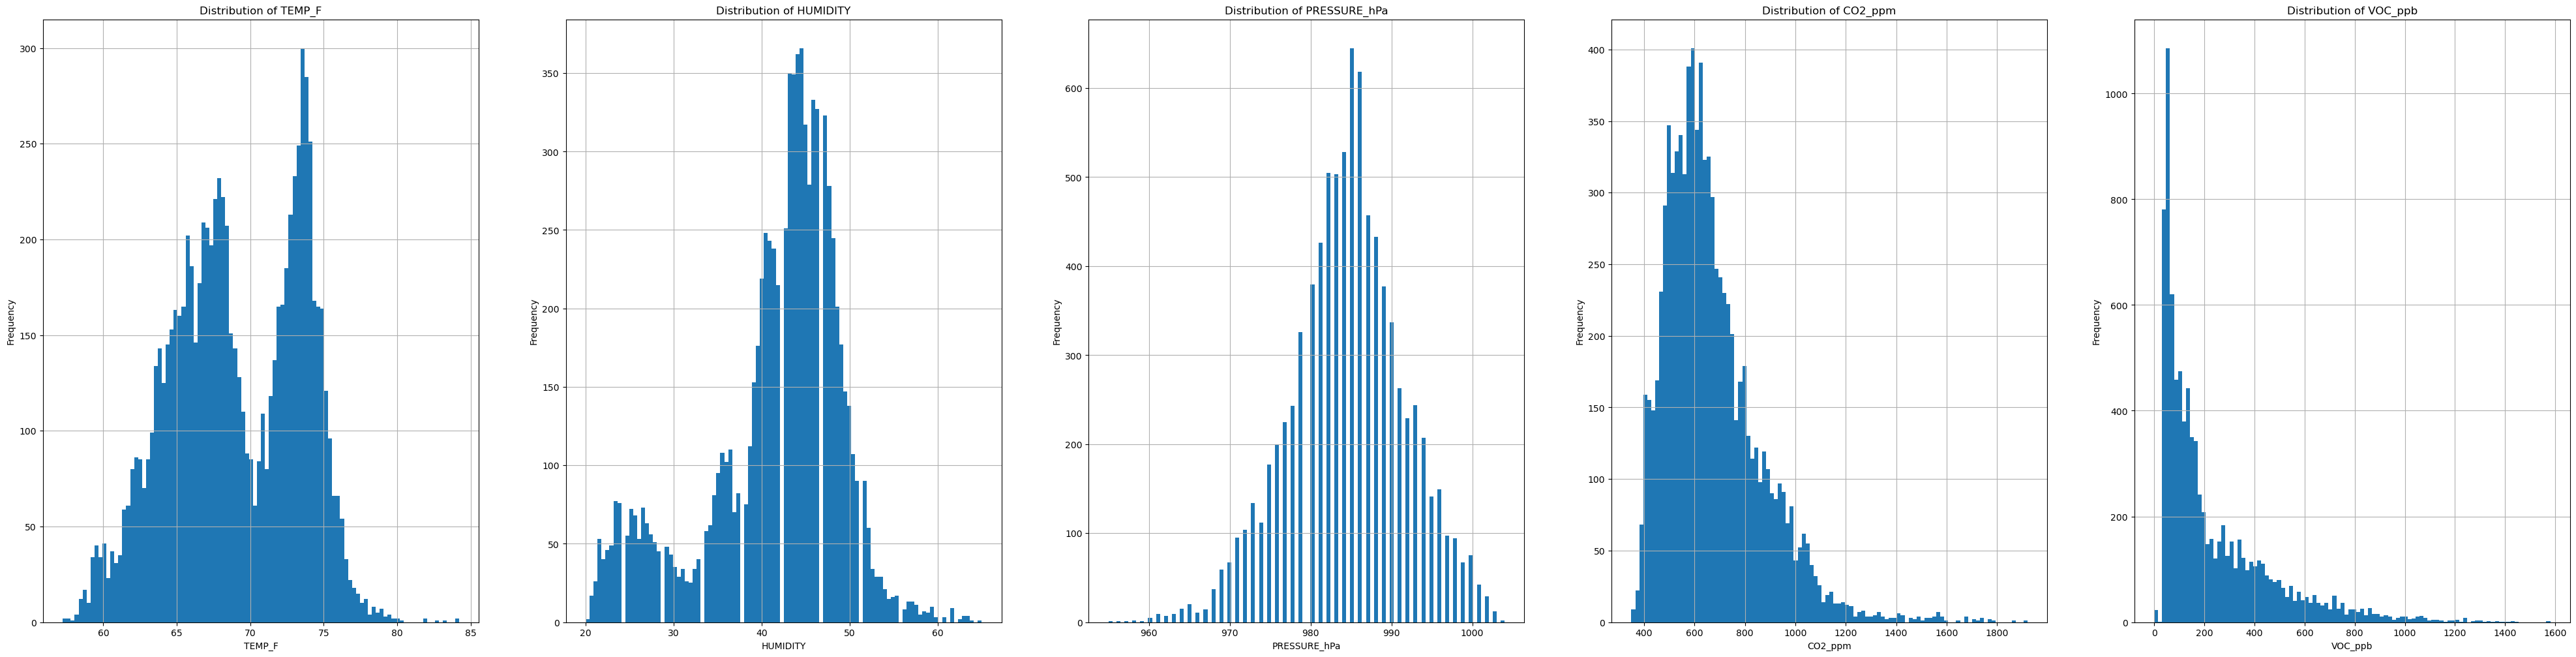

In [8]:
fig, axes = plt.subplots(1, 5, figsize=(50, 12))
for ax, column in zip(axes, df.columns[1:-1]):
    df[column].plot.hist(bins=100,
                    title=f'Distribution of {column}',
                    grid=True,
                    ax=ax)
    ax.set_xlabel(column)
plt.show()

<Axes: xlabel='High_CO2'>

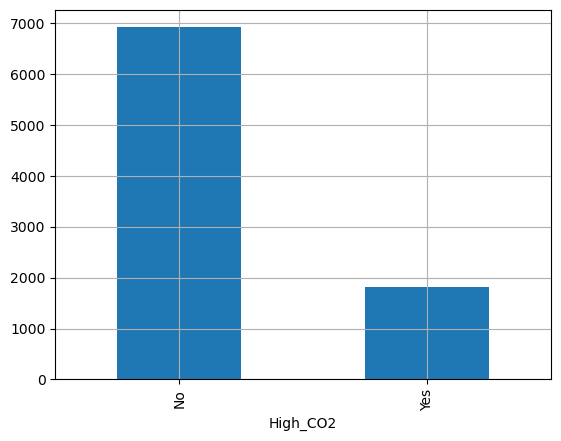

In [9]:
counts = df['High_CO2'].value_counts()
counts.plot(kind='bar', grid=True)

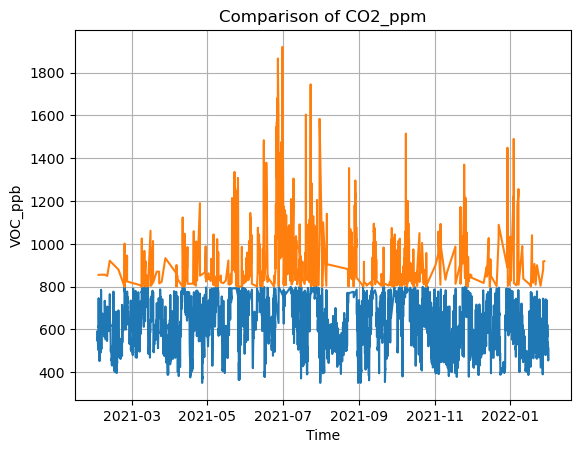

In [10]:
df_less = df[df['CO2_ppm'] < 800]
df_greater = df[df['CO2_ppm'] >= 800]
df_less
plt.plot(df_less['CO2_ppm'], label='CO2 < 800 ppm')
plt.plot(df_greater['CO2_ppm'], label='CO2 >= 800 ppm')
plt.title(f'Comparison of CO2_ppm')
plt.xlabel('Time')
plt.ylabel(column)
plt.grid(True)

### Observing time dependent behavior of all the columns over time

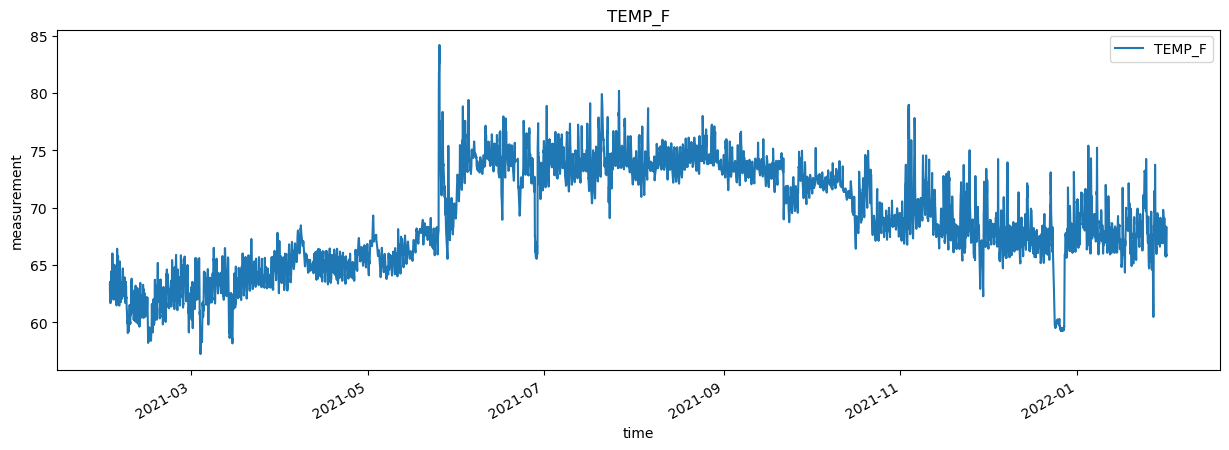

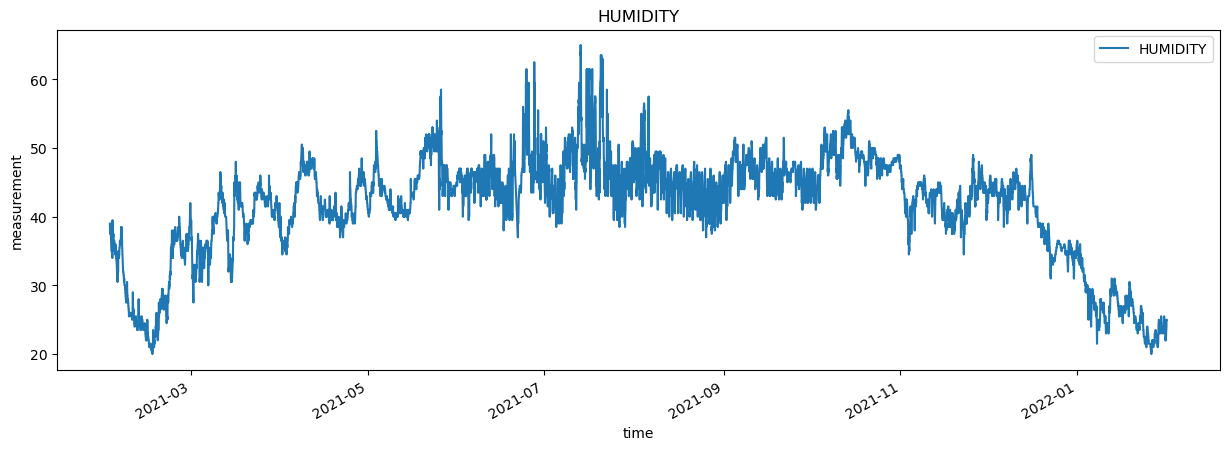

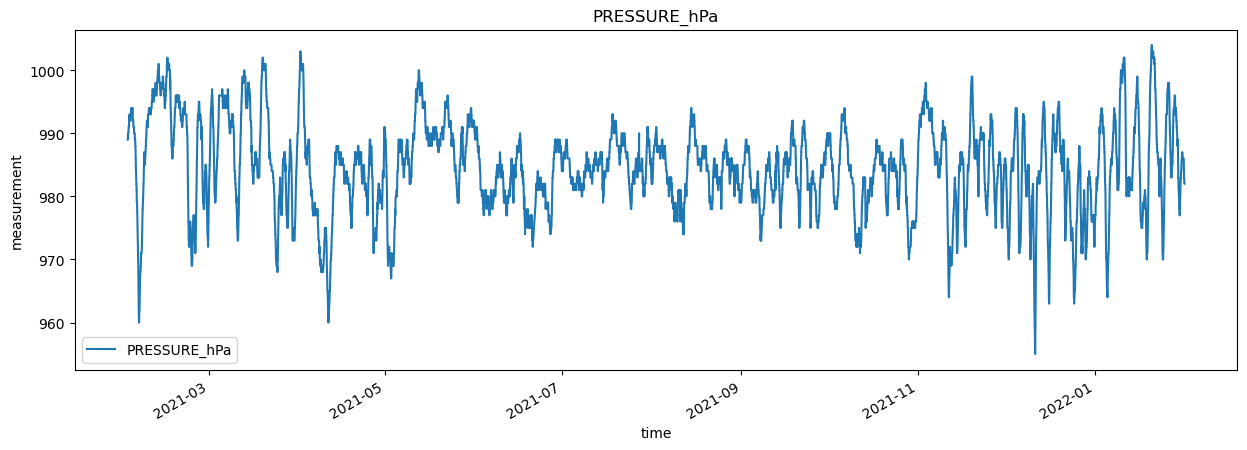

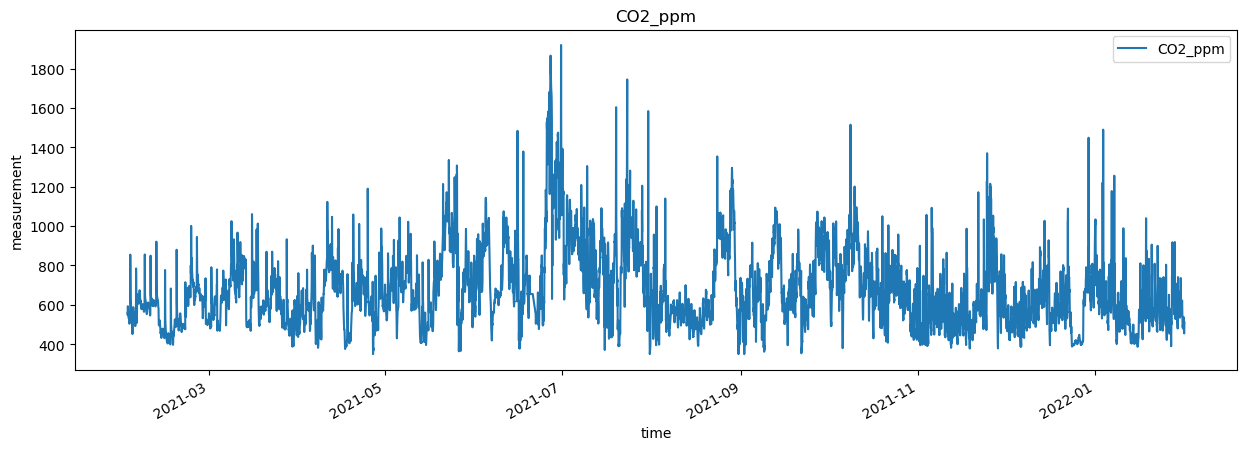

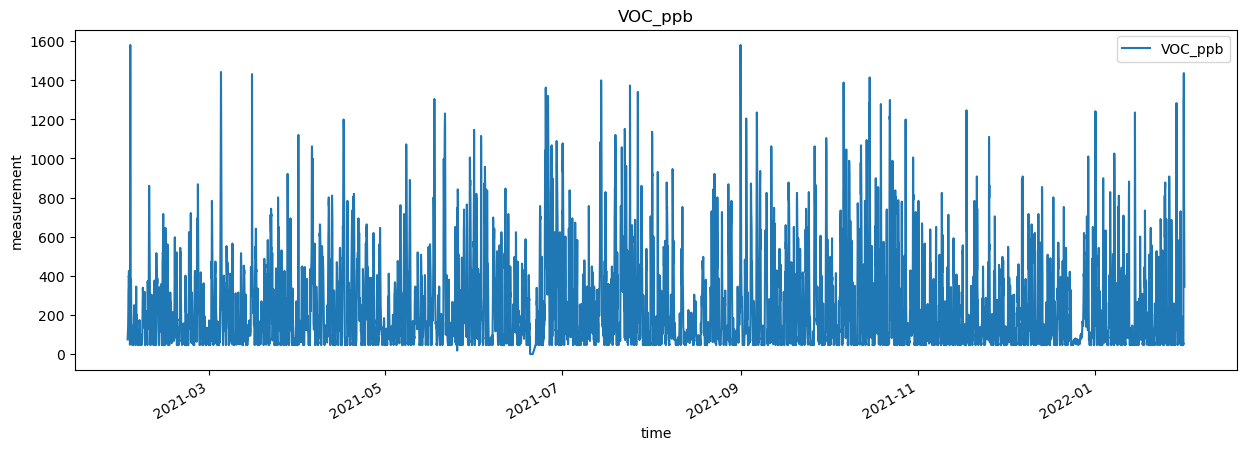

In [11]:
for ax, column in zip(axes, df.columns[1:-1]):
  df.loc[:].plot(y=column,
                 style="-",
                 figsize=(15, 5),
                 title = column,
                 xlabel = "time",
                 ylabel = "measurement")

Important to note, some of the data appears to have behavioral relationship with time. Come back to this later.

Investigating Humidity: there are gaps in the time series. Wanted to see if they had any periodicity or anything behavior.

<Axes: title={'center': 'Distribution of HUMIDITY'}, ylabel='Frequency'>

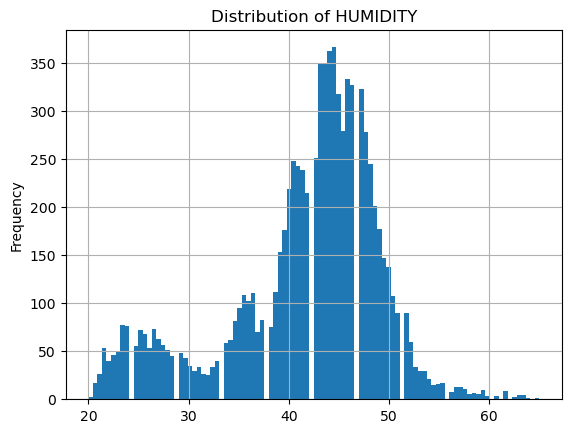

In [12]:
col = 'HUMIDITY'
df[col].plot.hist(bins=100,
                    title=f'Distribution of {col}',
                    grid=True)

In [25]:
df.index.min(), df.index.max()
df.head()

RADON_pCi/L  TEMP_F  HUMIDITY  PRESSURE_hPa  CO2_ppm  \
recorded                                                                    
2021-02-01 00:00:09         1.22   63.39      39.0           989      560   
2021-02-01 01:00:09         1.19   62.67      38.5           989      548   
2021-02-01 02:00:09         1.19   63.55      38.0           989      593   
2021-02-01 03:00:09         1.22   63.07      37.5           989      573   
2021-02-01 04:00:09         1.24   62.33      37.5           990      555   

                     VOC_ppb High_CO2  
recorded                               
2021-02-01 00:00:09     75.0       No  
2021-02-01 01:00:09     91.0       No  
2021-02-01 02:00:09    110.0       No  
2021-02-01 03:00:09    110.0       No  
2021-02-01 04:00:09    138.0       No

In [26]:
df.index = pd.to_datetime(df.index)
numeric_df = df.select_dtypes(include=['number'])

monthly_df = numeric_df.resample('M').mean()
weekly_df = numeric_df.resample("W").mean()
daily_df = numeric_df.resample('D').mean()
hourly_df = numeric_df.resample('H').mean()

print("Monthly data:")
display(monthly_df.head())
print("Weekly data:")
display(weekly_df.head())
print("Daily data:")
display(daily_df.head())
print("Hourly data:")
display(hourly_df.head())

Monthly data:


RADON_pCi/L     TEMP_F   HUMIDITY  PRESSURE_hPa     CO2_ppm  \
recorded                                                                  
2021-02-28     1.509003  62.230476  29.814732    988.449405  573.078869   
2021-03-31     0.711063  63.391319  39.074697    987.542396  624.487214   
2021-04-30     0.640125  65.288153  42.087500    981.568056  628.768056   
2021-05-31     0.533078  67.472944  45.081317    987.522849  711.686828   
2021-06-30     0.668436  73.634089  46.275466    981.945481  839.691535   

               VOC_ppb  
recorded                
2021-02-28  187.382440  
2021-03-31  222.160162  
2021-04-30  252.377778  
2021-05-31  245.153226  
2021-06-30  289.474892

Weekly data:


RADON_pCi/L     TEMP_F   HUMIDITY  PRESSURE_hPa     CO2_ppm  \
recorded                                                                  
2021-02-07     1.774643  62.786429  32.991071    983.446429  584.488095   
2021-02-14     1.763988  61.179940  24.196429    996.744048  548.154762   
2021-02-21     1.436786  61.773333  25.601190    992.922619  509.386905   
2021-02-28     1.060595  63.182202  36.470238    980.684524  650.285714   
2021-03-07     0.677515  62.319112  33.878698    991.437870  590.325444   

               VOC_ppb  
recorded                
2021-02-07  152.994048  
2021-02-14  234.547619  
2021-02-21  150.511905  
2021-02-28  211.476190  
2021-03-07  257.568047

Daily data:


RADON_pCi/L     TEMP_F   HUMIDITY  PRESSURE_hPa     CO2_ppm  \
recorded                                                                  
2021-02-01     1.212083  63.421250  36.562500    991.125000  560.166667   
2021-02-02     1.042083  63.443750  36.104167    992.958333  549.291667   
2021-02-03     1.263333  64.200000  32.916667    988.625000  552.583333   
2021-02-04     1.710417  63.141667  35.937500    972.375000  610.375000   
2021-02-05     1.887917  63.079167  33.770833    968.041667  614.083333   

               VOC_ppb  
recorded                
2021-02-01  257.666667  
2021-02-02  141.375000  
2021-02-03  133.875000  
2021-02-04   85.541667  
2021-02-05   78.208333

Hourly data:


RADON_pCi/L  TEMP_F  HUMIDITY  PRESSURE_hPa  CO2_ppm  \
recorded                                                                    
2021-02-01 00:00:00         1.22   63.39      39.0         989.0    560.0   
2021-02-01 01:00:00         1.19   62.67      38.5         989.0    548.0   
2021-02-01 02:00:00         1.19   63.55      38.0         989.0    593.0   
2021-02-01 03:00:00         1.22   63.07      37.5         989.0    573.0   
2021-02-01 04:00:00         1.24   62.33      37.5         990.0    555.0   

                     VOC_ppb  
recorded                      
2021-02-01 00:00:00     75.0  
2021-02-01 01:00:00     91.0  
2021-02-01 02:00:00    110.0  
2021-02-01 03:00:00    110.0  
2021-02-01 04:00:00    138.0

### Observing each columns relationship with other columns: identify any particular relationships between columns that is not time dependent

#### Total Data Analysis

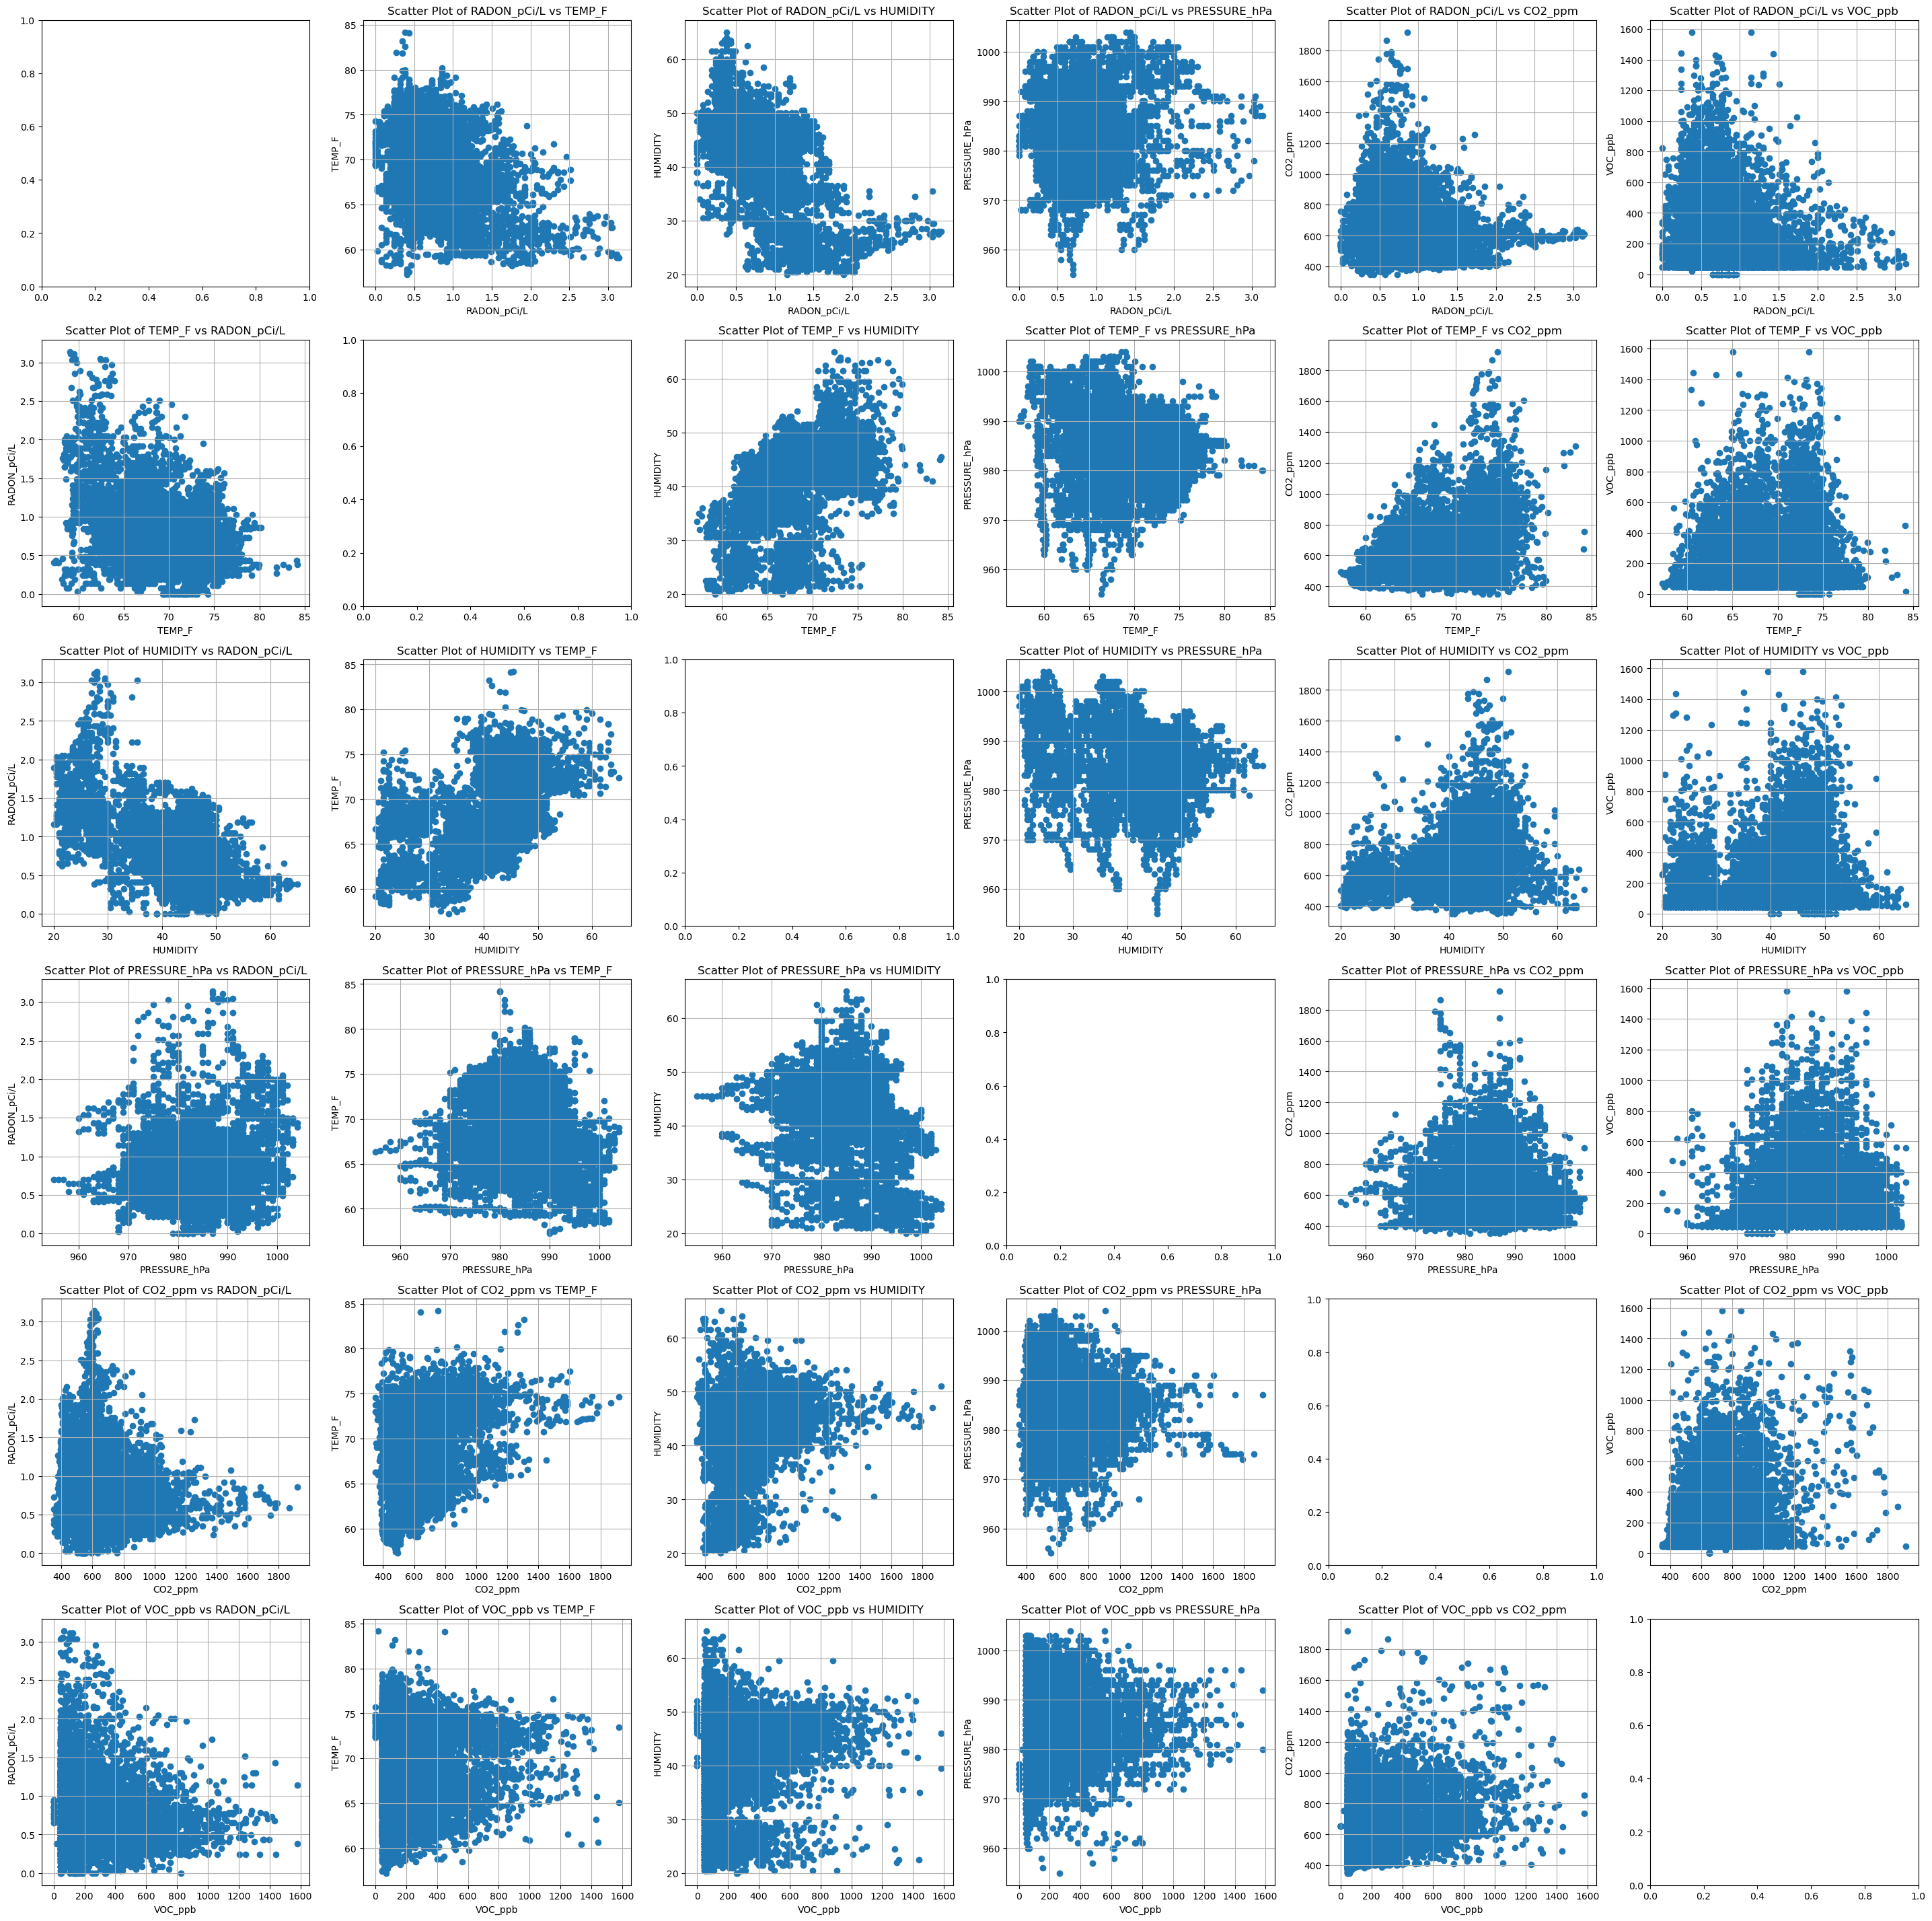

In [27]:
columns = df.columns
n = len(columns)-1

fig, axes = plt.subplots(n, n, figsize=(6*n, 6*n))

for i in range(n):
  for j in range(n):
    if i != j:
      axes[i, j].scatter(df[columns[i]], df[columns[j]])
      axes[i, j].set_title(f'Scatter Plot of {columns[i]} vs {columns[j]}')
      axes[i, j].set_xlabel(columns[i])
      axes[i, j].set_ylabel(columns[j])
      axes[i, j].grid(True)

plt.show()

#### Monthly Analysis


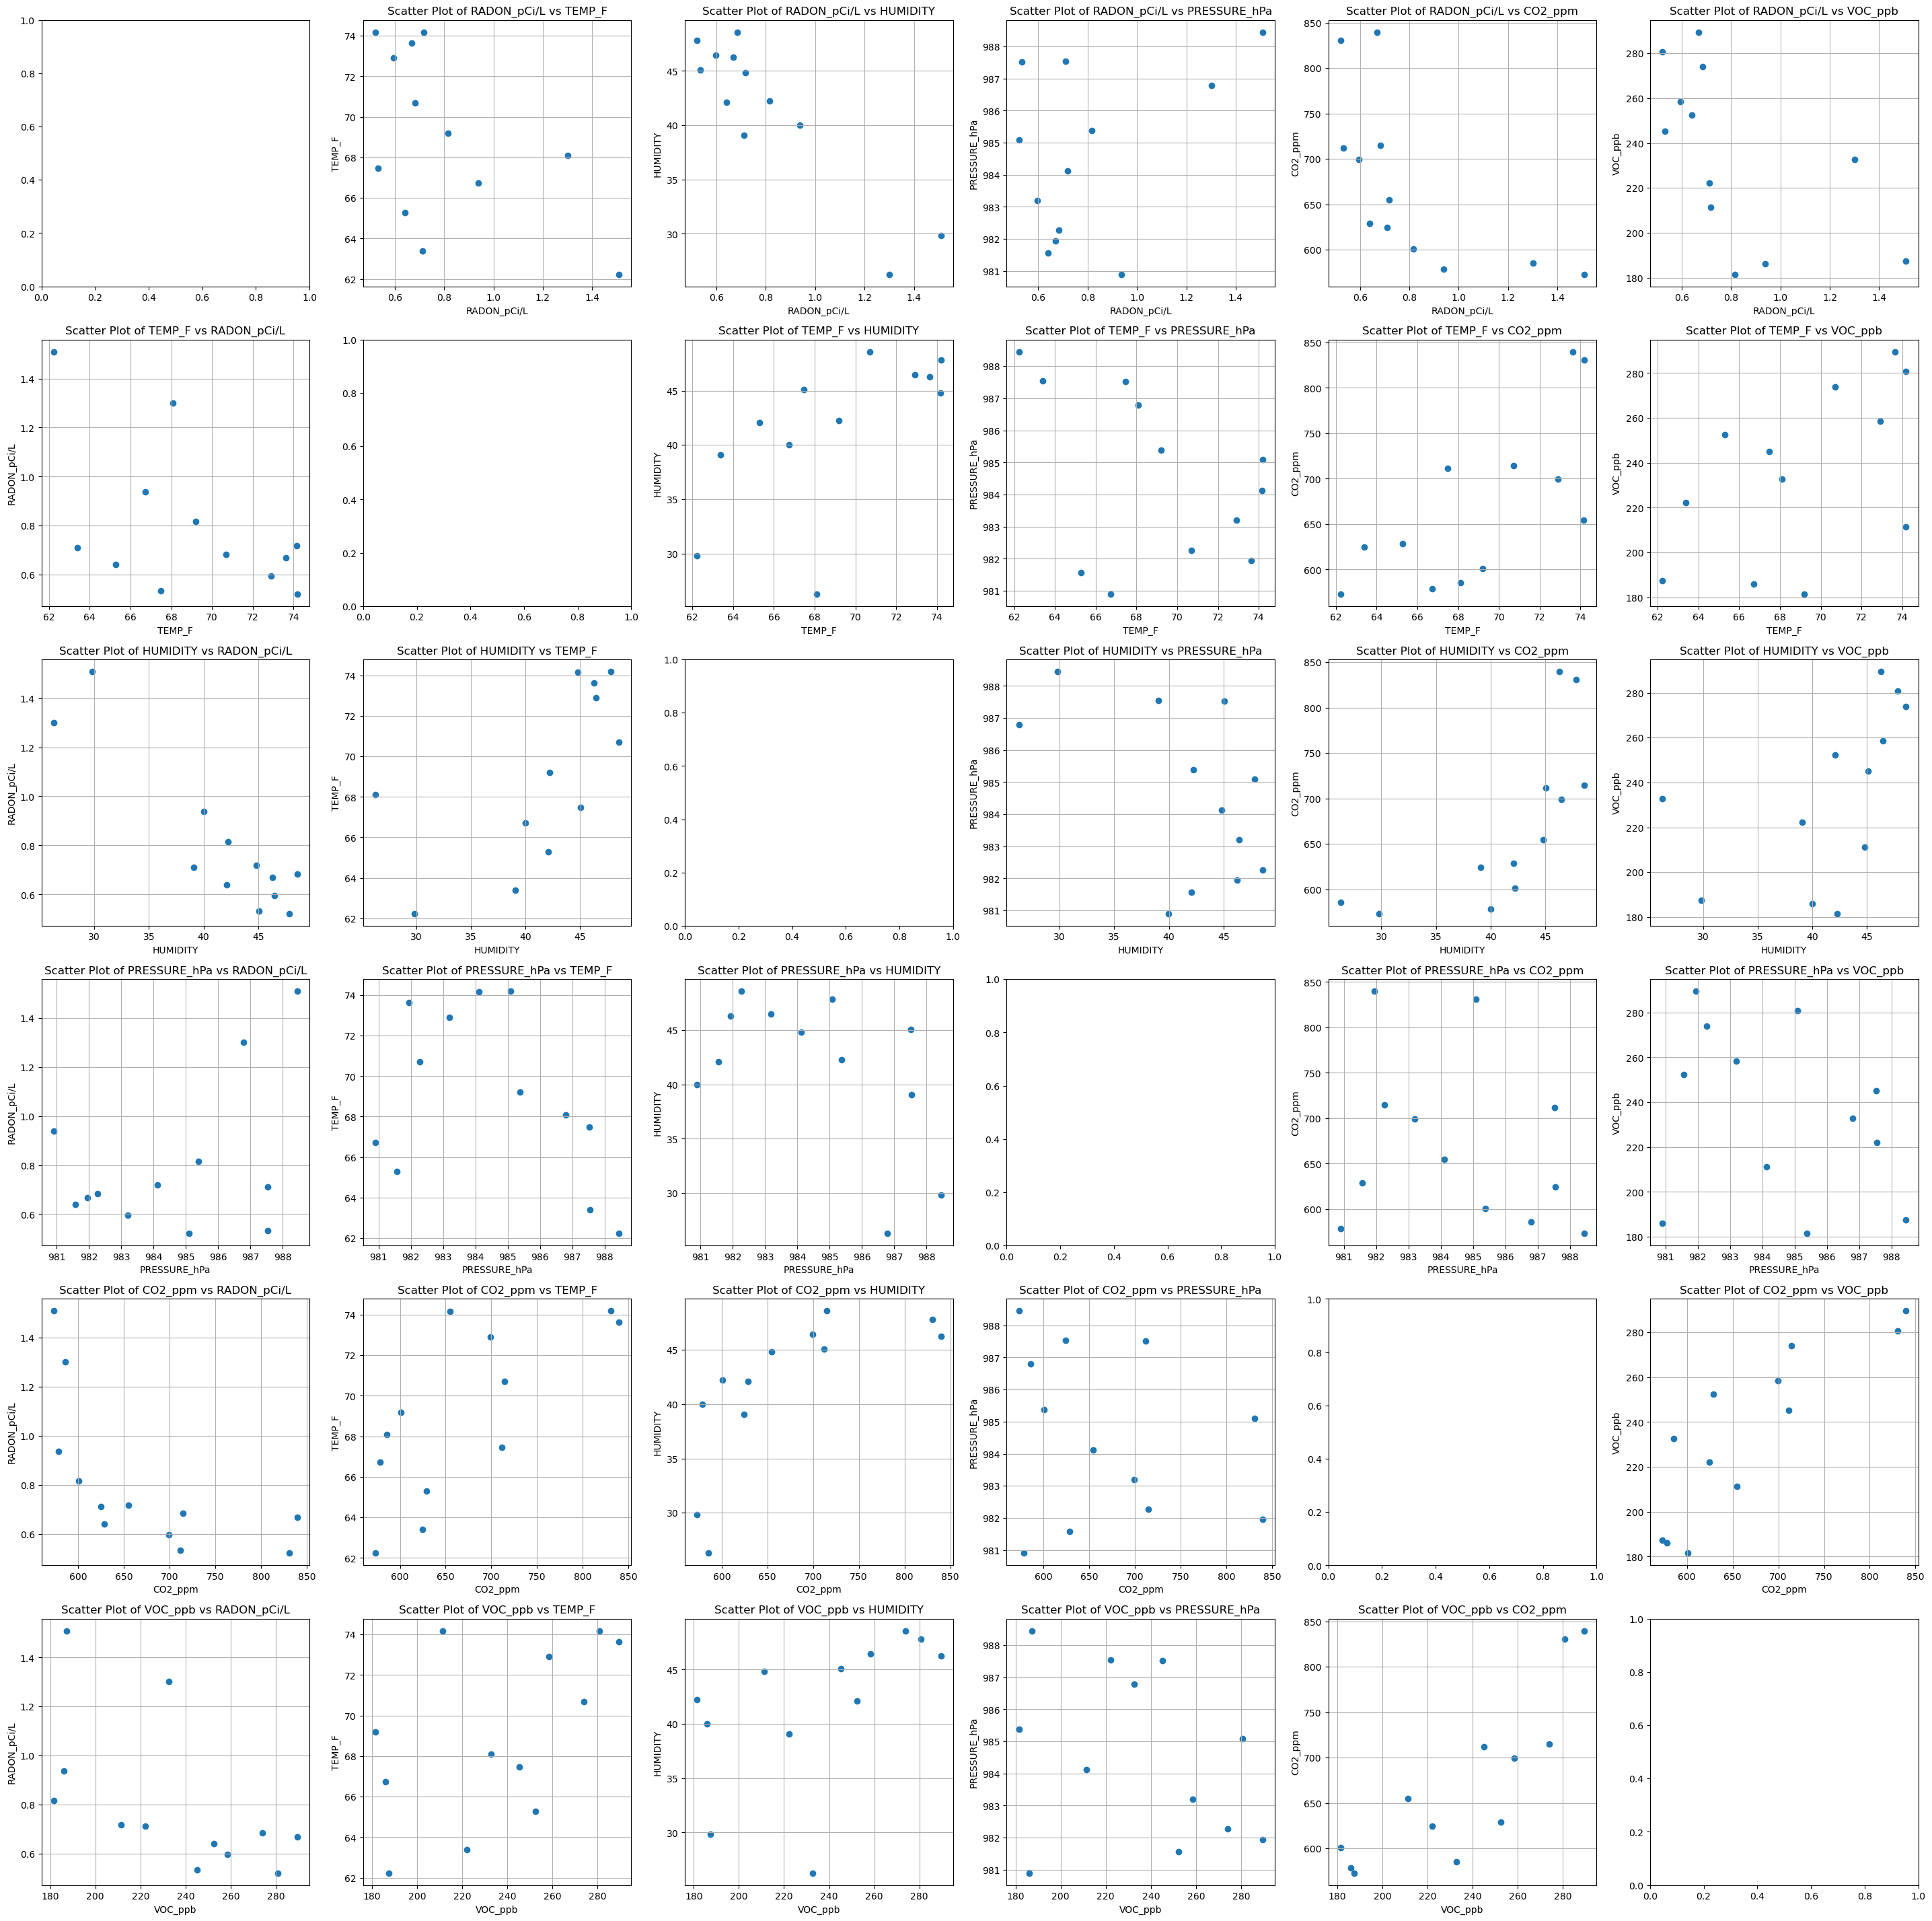

In [28]:
df = monthly_df
n = len(columns)-1

fig, axes = plt.subplots(n, n, figsize=(6*n, 6*n))

for i in range(n):
  for j in range(n):
    if i != j:
      axes[i, j].scatter(df[columns[i]], df[columns[j]])
      axes[i, j].set_title(f'Scatter Plot of {columns[i]} vs {columns[j]}')
      axes[i, j].set_xlabel(columns[i])
      axes[i, j].set_ylabel(columns[j])
      axes[i, j].grid(True)

# plt.show()

#### Weekly Analysis

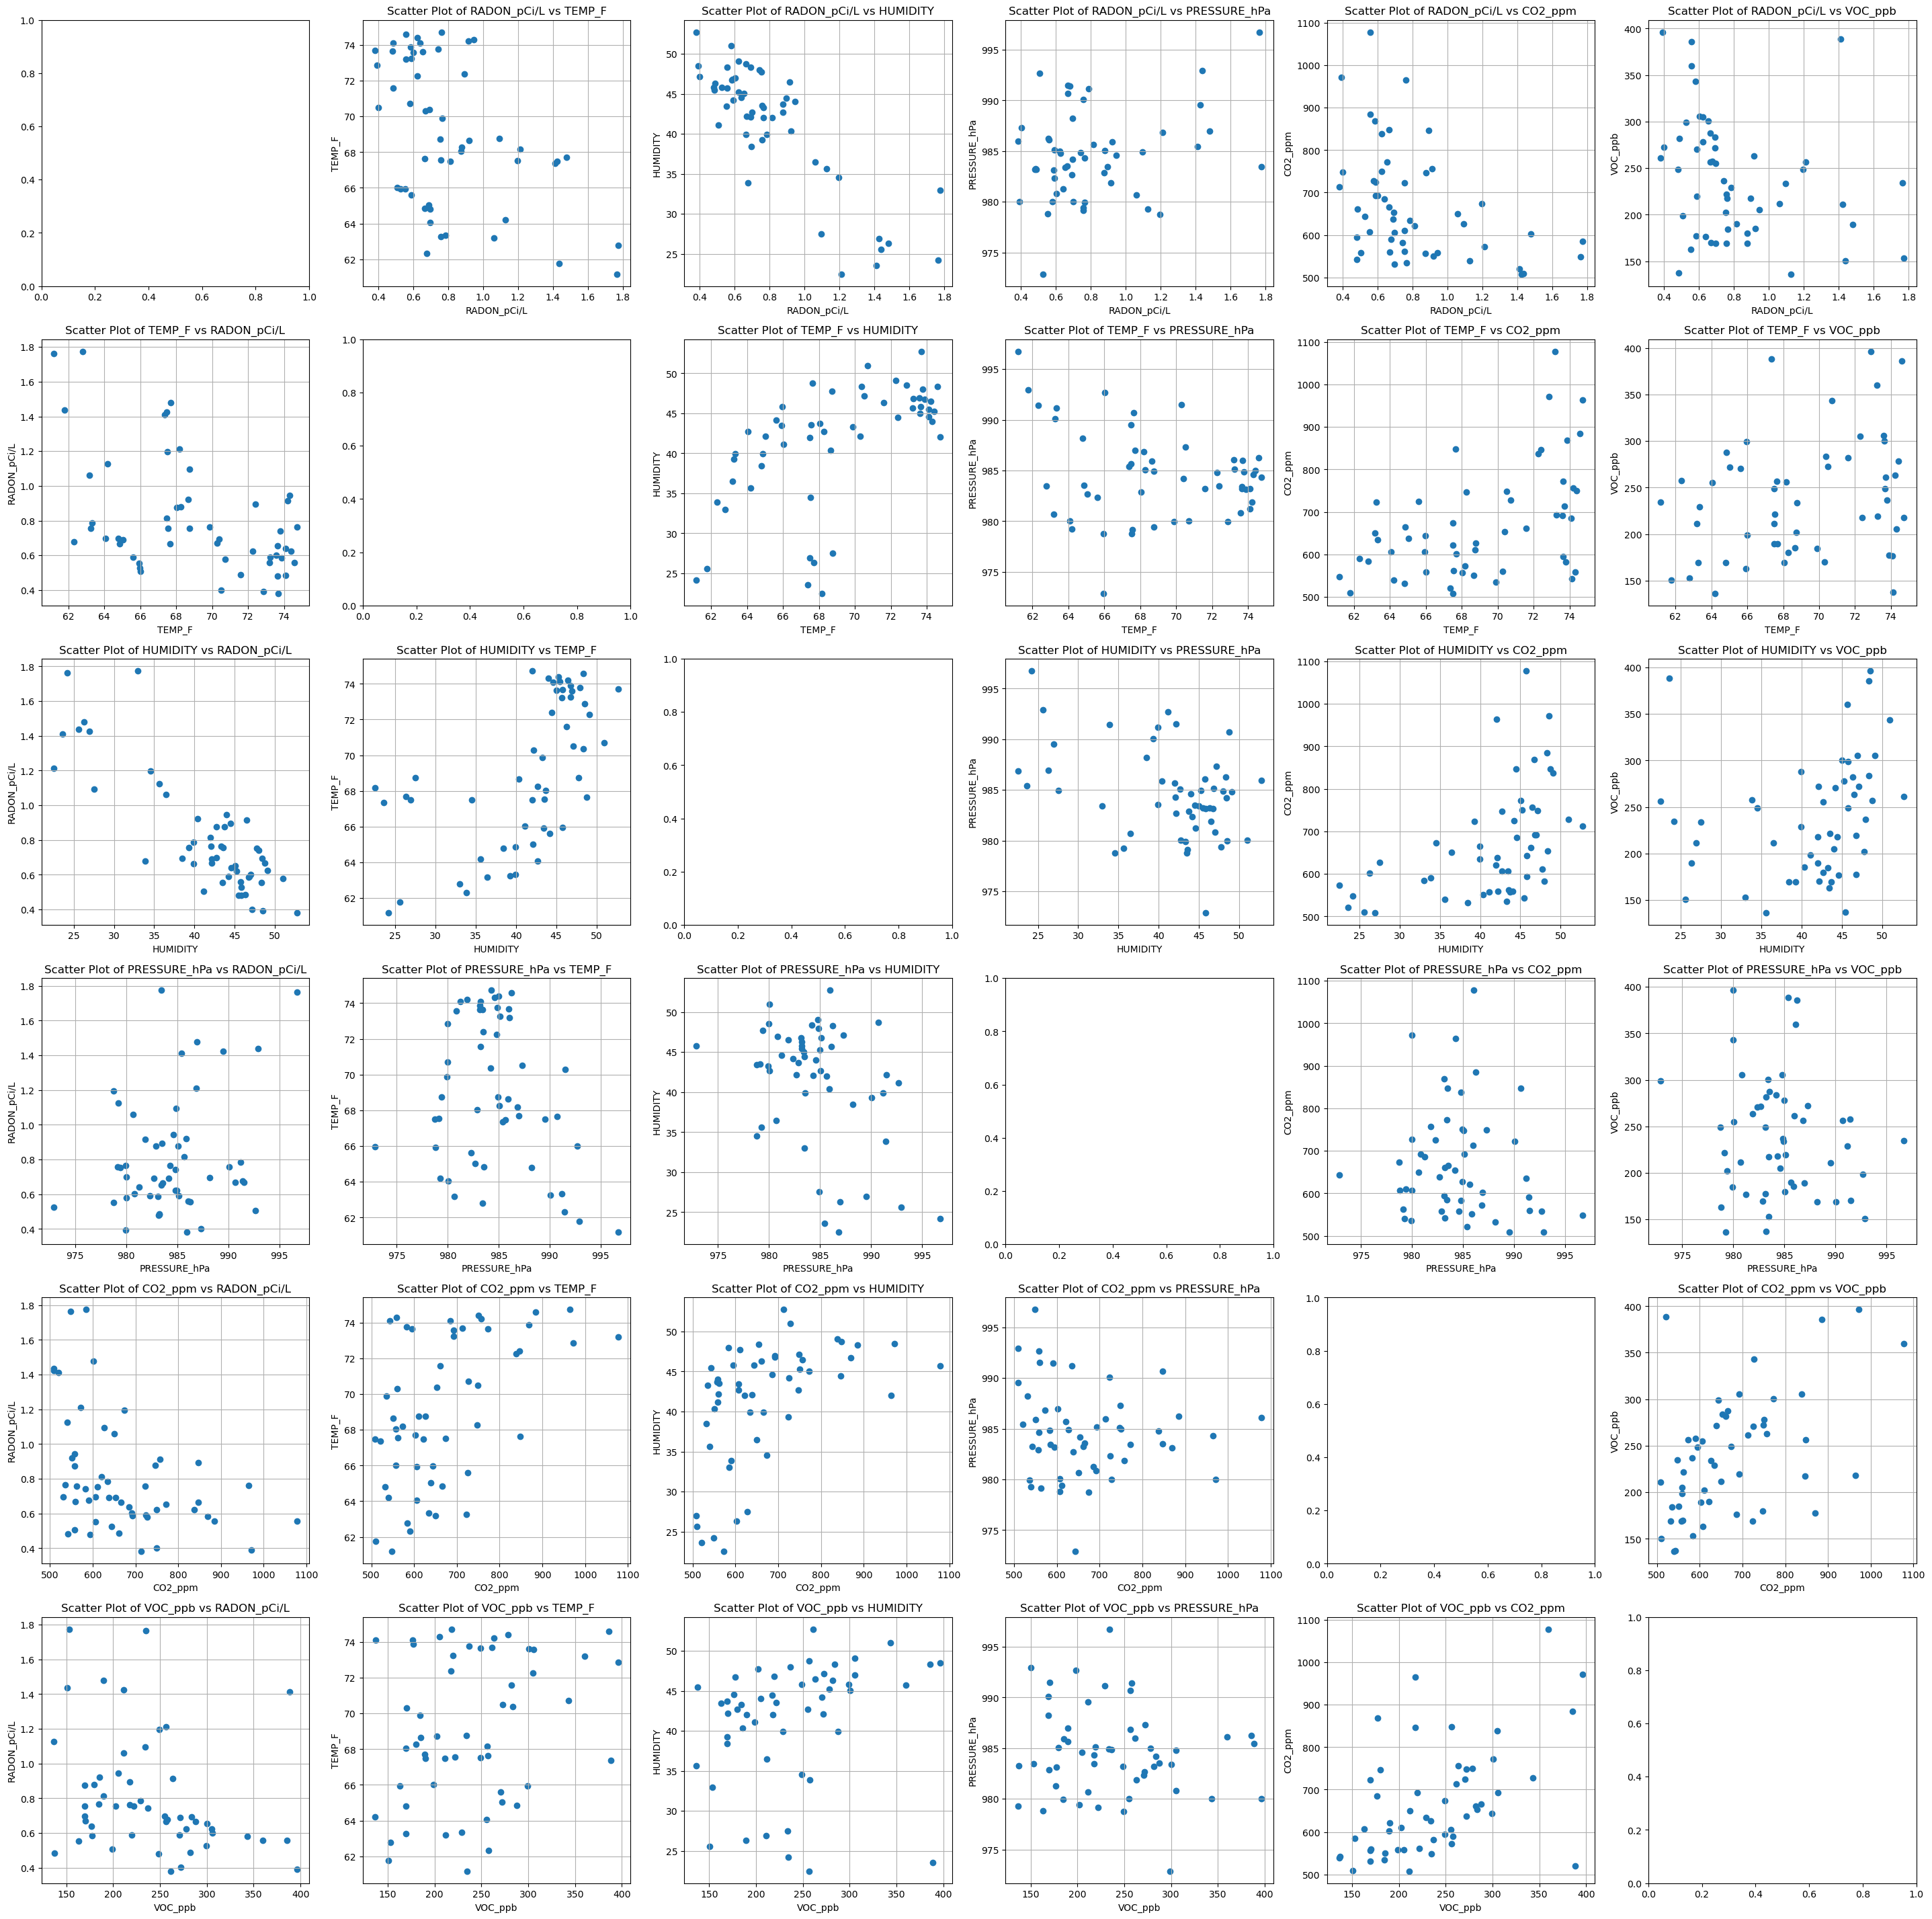

In [29]:
df = weekly_df
n = len(columns)-1

fig, axes = plt.subplots(n, n, figsize=(6*n, 6*n))

for i in range(n):
  for j in range(n):
    if i != j:
      axes[i, j].scatter(df[columns[i]], df[columns[j]])
      axes[i, j].set_title(f'Scatter Plot of {columns[i]} vs {columns[j]}')
      axes[i, j].set_xlabel(columns[i])
      axes[i, j].set_ylabel(columns[j])
      axes[i, j].grid(True)

# plt.show()

#### Daily Analysis

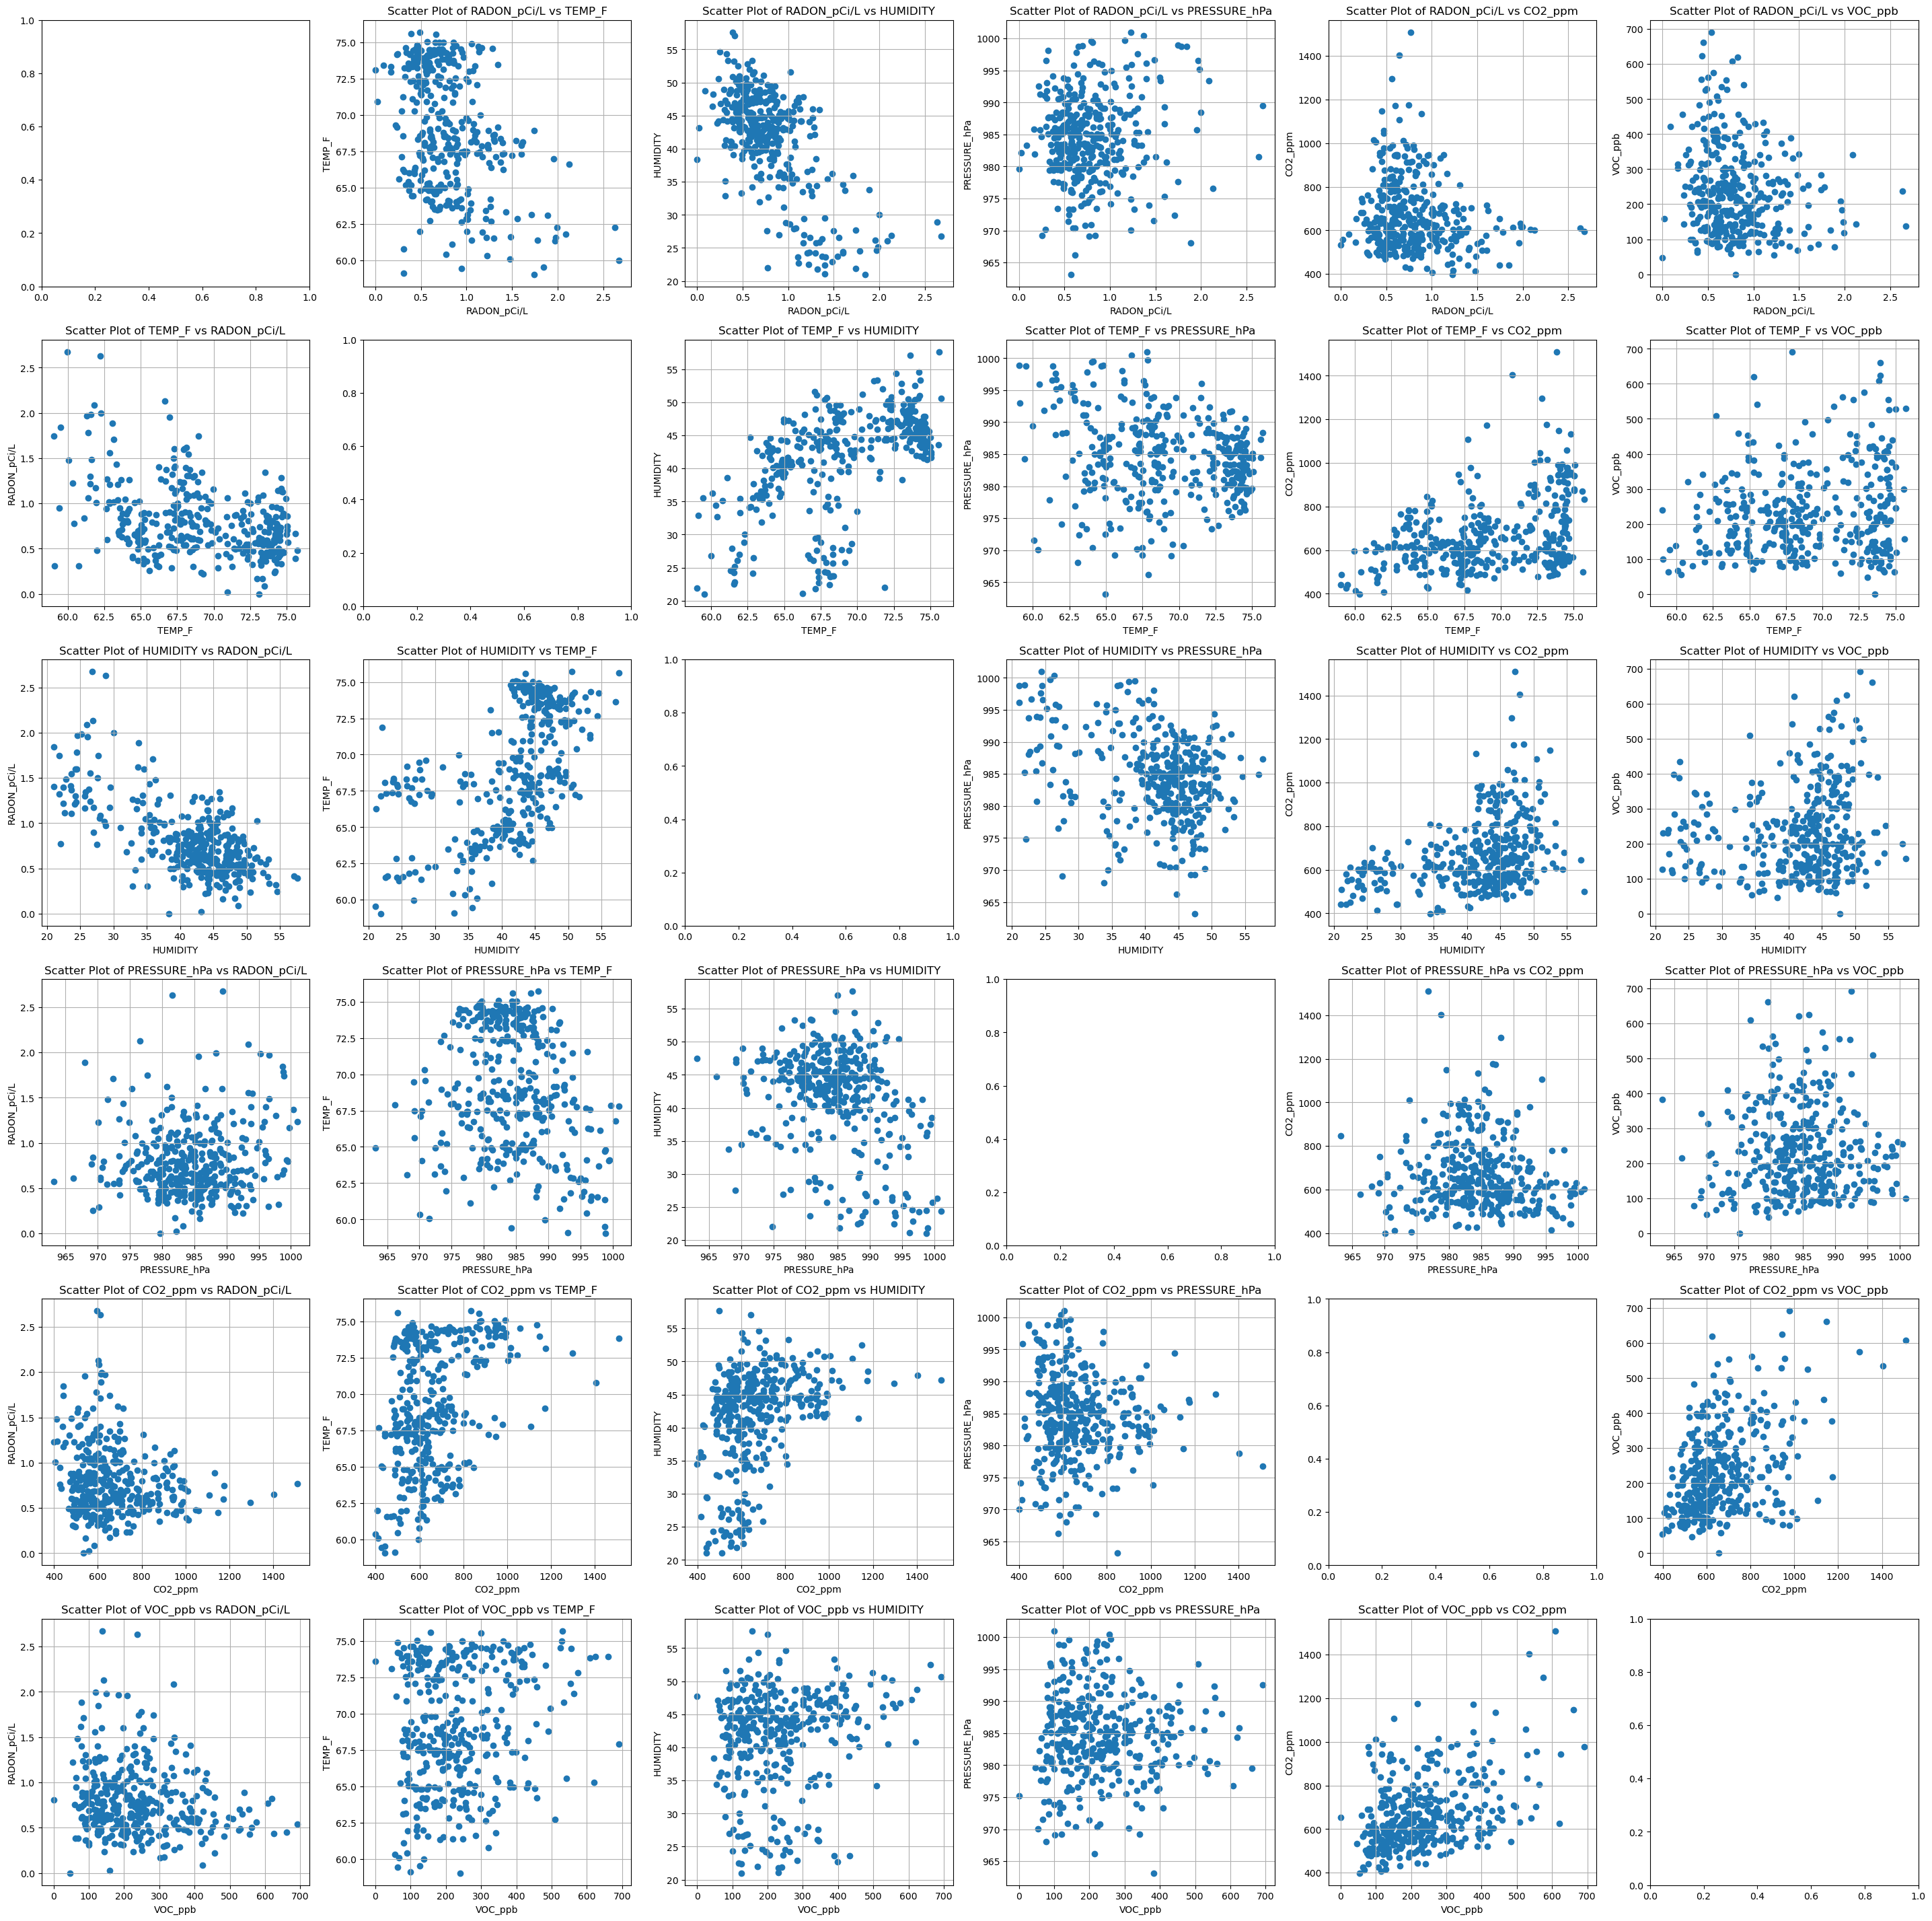

In [30]:
df = daily_df
n = len(columns)-1

fig, axes = plt.subplots(n, n, figsize=(6*n, 6*n))

for i in range(n):
  for j in range(n):
    if i != j:
      axes[i, j].scatter(df[columns[i]], df[columns[j]])
      axes[i, j].set_title(f'Scatter Plot of {columns[i]} vs {columns[j]}')
      axes[i, j].set_xlabel(columns[i])
      axes[i, j].set_ylabel(columns[j])
      axes[i, j].grid(True)

# plt.show()

### Data Cleansing
NA Removal <br>
Based on data exploration, we can remove elements that do not fit with the time series indices. I also add a column that indicates month: I am going to try to predict month

In [31]:
df = hourly_df
df_na = df.dropna()
df = df_na
df['month'] = df.index.month

C:\Users\shiha\AppData\Local\Temp\ipykernel_21892\205130982.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


## Prediction: Hypothesis
Can the month be predicted? <br>
First use PCA explained variance for feature importance. Get the features that are most important to predicting month

In [32]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df)
display(pca.explained_variance_ratio_)
df.columns

array([6.69129421e-01, 3.29356925e-01, 8.42306551e-04, 4.47391341e-04,
       1.42437788e-04, 8.02916647e-05, 1.22729760e-06])

Index(['RADON_pCi/L', 'TEMP_F', 'HUMIDITY', 'PRESSURE_hPa', 'CO2_ppm',
       'VOC_ppb', 'month'],
      dtype='object')

Columns of interest: <br>
'RADON_pCi/L', 'TEMP_F', 'HUMIDITY'

### Test Using Classification Techniques
Start with using KNN <br>
1: Start with just humidity and temperature <br>
2: Add more columns <br>

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [34]:
# X = df[['RADON_pCi/L', 'TEMP_F', 'HUMIDITY', 'PRESSURE_hPa', 'CO2_ppm', 'VOC_ppb']]
X_r2 = df[['RADON_pCi/L', 'TEMP_F']]
X_r3 = df[['RADON_pCi/L', 'TEMP_F', 'HUMIDITY']]
X_r4 = df[['RADON_pCi/L', 'TEMP_F', 'HUMIDITY', 'PRESSURE_hPa']]
X_r5 = df[['RADON_pCi/L', 'TEMP_F', 'HUMIDITY', 'PRESSURE_hPa', 'VOC_ppb']]
X_r6 = df[['RADON_pCi/L', 'TEMP_F', 'HUMIDITY', 'PRESSURE_hPa', 'VOC_ppb', 'CO2_ppm']]
Y = df['month']

x2_train, x2_test, y2_train, y2_test = train_test_split(X_r2, Y, test_size = 0.2)
x3_train, x3_test, y3_train, y3_test = train_test_split(X_r3, Y, test_size = 0.2)
x4_train, x4_test, y4_train, y4_test = train_test_split(X_r4, Y, test_size = 0.2)
x5_train, x5_test, y5_train, y5_test = train_test_split(X_r5, Y, test_size = 0.2)
x6_train, x6_test, y6_train, y6_test = train_test_split(X_r6, Y, test_size = 0.2)

#### Trying with KNN

In [35]:
def optimize_knn(x_train, x_test, y_train, y_test, draw = False):
  results = []
  for i in range(1, 50):
      knn = KNeighborsClassifier(n_neighbors=i)
      score = cross_val_score(knn, x_train, y_train, cv=10).mean()
      results.append({'Neighbors': i, 'Score': score})

  results_df = pd.DataFrame(results)
  best_n = results_df.loc[results_df['Score'].idxmax(), 'Neighbors']
  bestCV_score = results_df['Score'].max()

  # Want to get the best row that is not too comupationally intensive
  opt_n = 0
  prev_score = 0
  # for index, row in results_df.iterrows():
  #   score = row['Score']
  #   depth = row['Neighbors']
  #   if score >= prev_score and score - prev_score < 0.0001 and index != 0:
  #     opt_n = depth
  #     break
  #
  #   prev_score = score


  best_knn = KNeighborsClassifier(n_neighbors=best_n).fit(x_train, y_train)
  final_score = best_knn.score(x_test, y_test)
  # Optimum n = {opt_n - 1}.
  print(f"Best n = {best_n}. CV Score = {bestCV_score}. Final_score = {final_score}")

  if draw:
    plt.plot(results_df['Neighbors'], results_df['Score'])
    plt.title(f'Score by Neighbors using Columns: {x_train.columns.tolist()}')
    plt.xlabel('Neighbors')
    plt.ylabel('Score')
    plt.grid(True)
    plt.show()

  return best_knn

In [36]:
optimize_knn(x2_train, x2_test, y2_train, y2_test)
optimize_knn(x3_train, x3_test, y3_train, y3_test)
best_knn = optimize_knn(x4_train, x4_test, y4_train, y4_test) # Best performing model
optimize_knn(x5_train, x5_test, y5_train, y5_test)
optimize_knn(x6_train, x6_test, y6_train, y6_test)

Best n = 34. CV Score = 0.4696486179601642. Final_score = 0.4722381224957069
Best n = 10. CV Score = 0.6087802468528517. Final_score = 0.614768174012593
Best n = 1. CV Score = 0.7440631520264316. Final_score = 0.7200915855752719
Best n = 1. CV Score = 0.48568196072162034. Final_score = 0.49170005724098453
Best n = 1. CV Score = 0.348557497202307. Final_score = 0.338294218660561


KNeighborsClassifier(n_neighbors=1)

In [37]:
y_pred = best_knn.predict(x4_test)
confusion_matrix(y4_test, y_pred)

array([[140,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6],
       [  0, 134,   5,   1,   0,   0,   0,   0,   0,   0,   0,   1],
       [  0,  12, 111,  15,   9,   0,   0,   0,   0,   0,   3,   0],
       [  0,   3,   9,  98,   5,   0,   0,   0,   0,   1,   2,   7],
       [  0,   0,   5,   9, 128,   4,   2,   3,   2,   3,   3,   3],
       [  0,   0,   0,   0,   3,  70,  20,  18,  16,   5,   2,   0],
       [  0,   0,   0,   0,   1,  16,  92,  25,  13,   2,   0,   1],
       [  0,   0,   0,   0,   0,  15,  20,  80,  23,   4,   0,   0],
       [  0,   0,   0,   0,   2,  24,  23,  27,  79,   8,   2,   0],
       [  0,   0,   0,   0,   4,   5,  10,   3,   6, 118,   3,   0],
       [  0,   0,   5,   1,   6,   1,   2,   2,   1,   2, 110,  25],
       [  2,   0,   2,   8,   1,   0,   0,   0,   0,   2,  14,  98]],
      dtype=int64)

By manipulating the data being fed in, we can see that for some models, KNN has limited performance. We can rule out scenarios where KNN has limited performance. We know that using the whole data set is not a good idea. Focus on using parsed sets which is x4_train, x4_test, y4_train, y4_test sets.

#### Trying with Decision Tree

In [38]:
def optimize_dt(x_train, y_train, x_test, y_test, draw = True):
  results = []
  for i in range(1,50):
    clf = DecisionTreeClassifier(max_depth=i)
    score = cross_val_score(clf, x_train, y_train, cv = 10).mean()
    results.append({'Depth': i, 'Score': score})

  results_df = pd.DataFrame(results)
  best_depth = results_df.loc[results_df['Score'].idxmax(), 'Depth']
  bestCV_score = results_df['Score'].max()

  # Want to get the best row that is not too comupationally intensive
  opt_depth = 0
  prev_score = 0
  for index, row in results_df.iterrows():
    score = row['Score']
    depth = row['Depth']
    if abs(score - prev_score) < 0.001:
      opt_depth = depth
      break

    prev_score = score

  # Testing
  best_clf = DecisionTreeClassifier(max_depth = best_depth).fit(x_train, y_train)
  final_score = best_clf.score(x_test, y_test)
  print(f"Best depth = {best_depth}. Optimum depth = {opt_depth - 1}. CV Score = {bestCV_score}. Final score = {final_score}")

  if draw:
    plt.plot(results_df['Depth'], results_df['Score'])
    plt.title('Score by Depth')
    plt.xlabel('Depth')
    plt.ylabel('Score')
    plt.grid(True)
    plt.show()
  return best_clf

In [39]:
optimize_dt(x2_train, y2_train, x2_test, y2_test, draw = False) ## 2 Columns
optimize_dt(x3_train, y3_train, x3_test, y3_test, draw = False) ## 3 Columns
optimize_dt(x4_train, y4_train, x4_test, y4_test, draw = False) ## 4 Columns, predicted best performer from KNN data
optimize_dt(x5_train, y5_train, x5_test, y5_test, draw = False) ## 5 Columns
best_dt = optimize_dt(x6_train, y6_train, x6_test, y6_test, draw = False) ## 6 Columns, Best performer

Best depth = 9. Optimum depth = 6.0. CV Score = 0.4656443302138544. Final score = 0.477389811104751
Best depth = 12. Optimum depth = 15.0. CV Score = 0.6312626306102456. Final score = 0.6302232398397253
Best depth = 49. Optimum depth = 20.0. CV Score = 0.7424884505494955. Final score = 0.7178019461934745
Best depth = 18. Optimum depth = 16.0. CV Score = 0.7409092399703219. Final score = 0.7498568975386377
Best depth = 36. Optimum depth = 18.0. CV Score = 0.7761249185287209. Final score = 0.7779049799656554


In [40]:
y_pred = best_dt.predict(x6_test)
confusion_matrix(y6_test, y_pred)

array([[139,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6],
       [  0, 138,   6,   1,   0,   0,   0,   0,   0,   0,   0,   3],
       [  0,   3, 104,  20,   9,   0,   0,   0,   0,   0,   3,   4],
       [  0,   2,  12, 120,  13,   0,   0,   0,   0,   0,   1,   6],
       [  0,   0,   1,   9, 110,   4,   0,   2,   3,   1,   1,   2],
       [  0,   0,   0,   0,   3,  98,   9,  13,   8,   4,   5,   0],
       [  0,   0,   0,   0,   4,  14, 104,   7,  11,   5,   0,   1],
       [  0,   0,   0,   0,   0,   9,  11, 129,   9,   6,   2,   2],
       [  0,   0,   0,   0,   1,  19,   7,   8, 106,  11,   1,   0],
       [  0,   0,   0,   1,   2,   1,   1,   1,  10, 113,   3,   1],
       [  0,   0,   5,   2,   7,   4,   3,   0,   1,   5,  99,  23],
       [  5,   0,   3,   2,   2,   0,   0,   0,   0,   1,  20,  99]],
      dtype=int64)

Important to note that the range of max depth was tested up to 100. Results always returned the max allowable tested depth, unlike using the reduced set. CV scores and final score seemed to converge beyond approximately depth of 15. This code shows that the computationally optimal depth is about 16.

## Conclusion

Best n = 1. CV Score = 0.7440631520264316. Final_score = 0.7200915855752719
Best depth = 31. Optimum depth = 15.0. CV Score = 0.7761263532430693. Final score = 0.7796222095020034
Best depth = 7. Optimum depth = 7.0. CV Score = 1.0. Final score = 0.7796222095020034


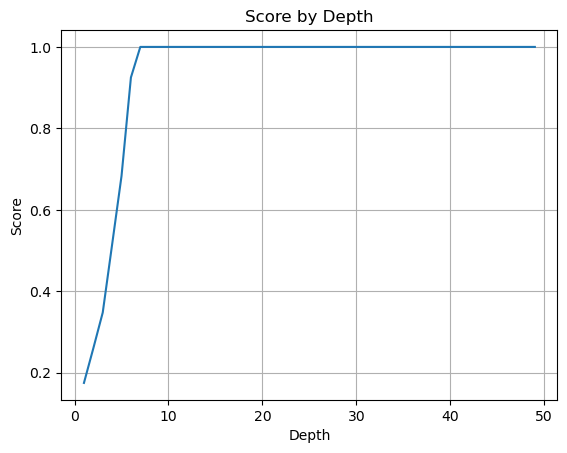

In [41]:
best_knn = optimize_knn(x4_train, x4_test, y4_train, y4_test, draw = False) # Best performing model
best_dt = optimize_dt(x6_train, y6_train, x6_test, y6_test, draw = False) ## 6 Columns, Best performer

knn_train = best_knn.predict(x4_train)
dt_train = best_dt.predict(x6_train)

knn_test = best_knn.predict(x4_test) ## Used Later
dt_test = best_dt.predict(x6_test)
comb_test = np.column_stack((knn_test, dt_test))

comb_train = np.column_stack((knn_train, dt_train))
final_model = optimize_dt(comb_train, y6_train, comb_test, y6_test)

That was a last ditch effort of trying to combine the outputs of the two optimized models. What is very interesting is that although the final score, the percentage of correct classification seemed cap to the performance of the single best model, a decision tree classifier. Whats striking is the CV rate became 1 very very quickly. It is also worth noting, referring to the confusion matrix below, that misclassifications is well tuned to where the misclassifications "should" be. It also shows a problem area where june-august are often times confused as one another which isn't totally wrong or bad.

In [42]:
y_pred = final_model.predict(comb_test)
confusion_matrix(y6_test, y_pred)

array([[137,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   8],
       [  0, 138,   6,   1,   0,   0,   0,   0,   0,   0,   0,   3],
       [  0,   3, 104,  21,   6,   0,   0,   0,   0,   0,   4,   5],
       [  0,   3,   9, 122,  15,   0,   0,   0,   0,   0,   1,   4],
       [  0,   0,   0,   9, 111,   4,   0,   1,   3,   1,   2,   2],
       [  0,   0,   0,   0,   3, 100,   9,  14,   8,   1,   5,   0],
       [  0,   0,   0,   0,   6,  13, 107,   6,  10,   4,   0,   0],
       [  0,   0,   0,   0,   0,  14,  12, 123,  11,   4,   1,   3],
       [  0,   0,   0,   0,   1,  19,   7,  10, 105,   8,   3,   0],
       [  0,   0,   0,   1,   2,   1,   2,   1,  10, 113,   3,   0],
       [  0,   0,   6,   2,   8,   3,   3,   0,   2,   1, 104,  20],
       [  5,   0,   4,   2,   3,   0,   0,   0,   0,   1,  19,  98]],
      dtype=int64)